Nombre: David Díaz Paz y Puente | Matricula: 650794

# A1.2 - Regresión Lineal

## 1. Introducción

La felicidad es un fenómeno complejo que integra factores económicos, sociales y de bienestar, lo que dificulta su medición directa. No obstante, el World Happiness Report ha desarrollado una metodología que permite estimar y comparar el nivel promedio de felicidad entre distintos países. Uno de los factores más comúnmente asociados a este indicador es el producto interno bruto (GDP); sin embargo, analizar la felicidad únicamente a partir de una variable económica resulta limitado y no refleja la naturaleza multidimensional del bienestar social.

En esta actividad se analiza la relación entre el nivel de felicidad y diversas variables económicas y sociales mediante modelos de regresión lineal. Inicialmente, se emplea un modelo de regresión lineal simple para evaluar la asociación entre la felicidad y una variable explicativa principal. Posteriormente, el análisis se extiende a un modelo de regresión lineal múltiple, incorporando variables adicionales obtenidas de fuentes públicas y confiables, con el objetivo de mejorar la capacidad explicativa del modelo.

El reporte documenta el proceso de exploración de datos, la construcción de los modelos y la interpretación de los resultados a través de texto, tablas y figuras, concluyendo con una comparación crítica entre los modelos y una reflexión sobre sus alcances y limitaciones.

In [44]:
import pandas as pd

ruta = f'felicidad_gdp.csv'
df = pd.read_csv(ruta)

## 2. Metodología

Para el desarrollo del presente análisis se utilizó el archivo “felicidad_gdp.csv”, el cual contiene información correspondiente al nivel de felicidad reportado en el año 2022 y el producto interno bruto (GDP) del año 2020 para un conjunto de países. El índice de felicidad proviene del World Happiness Report, mientras que el GDP se emplea como un indicador del nivel de desarrollo económico de cada nación.

### Primeros 5 datos de la base de datos:

In [45]:
print(df.head())


          Pais  Felicidad           GDP
0  Afghanistan     2.4038  2.011614e+10
1      Albania     5.1988  1.513187e+10
2      Algeria     5.1223  1.450090e+11
3    Argentina     5.9670  3.895910e+11
4      Armenia     5.3986  1.264121e+10


### Información general

In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pais       141 non-null    object 
 1   Felicidad  141 non-null    float64
 2   GDP        141 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB
None


En total tenemos un listado de 141 países que componen la base de datos con las variables de cada país siendo "GDP" (variable explicativa) y "Felicidad" (variable de respuesta), como fue mencionado anteriormente. La base de datos se compone de 141 filas y 3 columnas. Para el análisis inicial se seleccionó el producto interno bruto (GDP) como variable explicativa, dado que este indicador refleja el nivel de desarrollo económico y las condiciones materiales de los países. Ambas de estas variables son de carácter cuantitativo, lo que nos da el primer indicio hacia un problema de regresión. A continuación se presentan diagramas de dispersión de acuerdo con los datos presentes. 

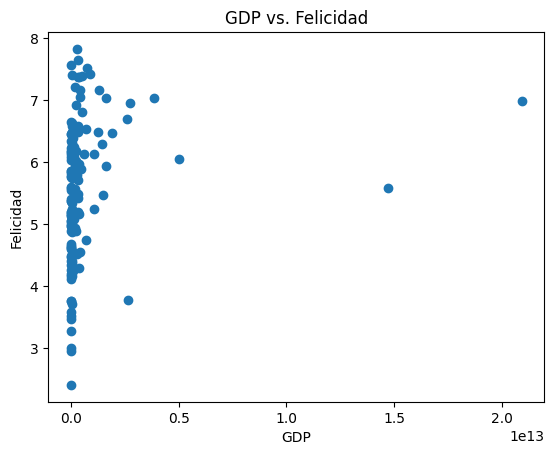

In [47]:
y = df.Felicidad
x = df.GDP

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.ylabel("Felicidad")
plt.xlabel("GDP")
plt.title("GDP vs. Felicidad")
plt.show()

Como podemos ver, la escala que utilizan los valores de la variable "GDP" no es completamente consistente. Debido a que existe variación en el orden de magnitud, se aplicará una transformación logaritmica para poder hacer un análisis visual más claro del diagrama de dispersión "GDP vs. Felicidad" sin perder una característica vital para la variable "GDP"; el orden de magnitud, y así poder encontrar una relación entre ambas variables. 

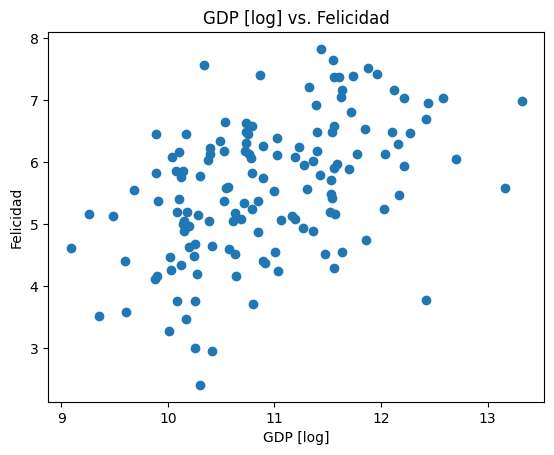

In [48]:
import numpy as np

x_log = np.log10(x)

plt.scatter(x_log, y)
plt.ylabel("Felicidad")
plt.xlabel("GDP [log]")
plt.title("GDP [log] vs. Felicidad")
plt.show()

A partir de la exploración gráfica, se observa una relación positiva general entre el GDP y el nivel de felicidad, en otras palabras: los países con mayores niveles de ingreso tienden a reportar mayores niveles de felicidad. No obstante, la dispersión de los datos sugiere que esta relación no es estrictamente lineal y que existen diferencias significativas entre países con niveles económicos similares.  

### Coeficientes óptimos para demostrar una relación lineal

In [49]:
xBar = np.mean(x_log)
yBar = np.mean(y)
B1num = sum((x_log-xBar)*(y-yBar))
B1den = sum((x_log-xBar)**2)
B1 = B1num / B1den
B0 = yBar - (B1*xBar)
print("B0 =",B0)
print("B1 =",B1)

B0 = -1.3023500570747224
B1 = 0.6281284658810403


$y = -1.3 + 0.628x$

### Regresión Lineal Simple

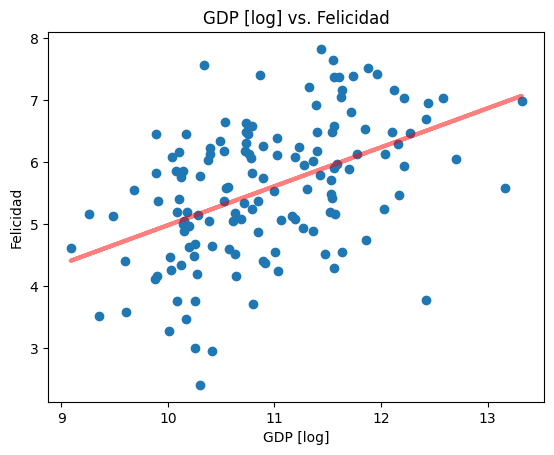

In [50]:
plt.scatter(x_log, y)
plt.ylabel("Felicidad")
plt.xlabel("GDP [log]")
plt.title("GDP [log] vs. Felicidad")
yHat = B0 + B1*x_log
plt.plot(x_log, yHat, c = "r", linewidth = 3, alpha = 0.5)
plt.show()

El análisis de la felicidad utilizando únicamente el GDP presenta limitaciones importantes, ya que el bienestar de una sociedad es un fenómeno multidimensional. Factores sociales, institucionales y de salud, entre otros, también influyen de manera significativa en la percepción de felicidad. En consecuencia, el uso de una sola variable explicativa resulta insuficiente para capturar la complejidad del fenómeno, lo que justifica la incorporación de variables adicionales en etapas posteriores del análisis.

#### Resultados del modelo de regresión lineal simple

In [51]:
RSS = sum((y - yHat)**2)
print("RSS =", RSS)

n = len(x)
SEB1 = np.sqrt(RSS / ((n-2)*sum((x_log-xBar)**2)))
print("SE (B1) =",SEB1)

import scipy.stats as st
t = B1 / SEB1
p = st.t.sf(abs(t),n-2)*2
print("t-statistic =",t)
print("p-value =",p)

import scipy.stats as st
per = st.t.interval(confidence = 0.95, df = n-2)[1]
CIlow = B1 - per*SEB1
CIhigh = B1 + per*SEB1
print("Inervalo de confianza: (",CIlow,",",CIhigh,")")

RSS = 131.37383177326345
SE (B1) = 0.09983378435340723
t-statistic = 6.291742519320844
p-value = 3.825717831968791e-09
Inervalo de confianza: ( 0.4307393313073308 , 0.8255176004547499 )


En el modelo de regresión lineal simple (Felicidad ~ GDP), se obtuvo un valor p de 3.83×10⁻⁹, el cual es extremadamente pequeño. Este resultado indica que, bajo la hipótesis nula de ausencia de relación entre el GDP y la felicidad, sería prácticamente imposible observar un efecto tan pronunciado como el estimado, reflejado en un estadístico t de 6.29. 

De manera consistente, el intervalo de confianza al 95 % para la pendiente, (0.431, 0.826), no incluye el valor cero, lo que confirma que el coeficiente es estadísticamente distinto de cero y positivo. En consecuencia, el modelo sugiere que, en promedio, un mayor GDP se asocia con un mayor nivel de felicidad.

La significancia estadística del coeficiente se ve reforzada por su error estándar relativamente bajo (0.0998), lo cual indica una estimación precisa de la pendiente. El valor elevado del estadístico t se explica precisamente por el hecho de que el coeficiente estimado es varias veces mayor que su error estándar.
Por otro lado, el desempeño global del modelo fue evaluado mediante el cálculo del error residual total (RSS), que arrojó un valor de 131.38. Este resultado pone de manifiesto que una proporción considerable de la variabilidad observada en los niveles de felicidad no es explicada únicamente por el GDP. No obstante, este hallazgo es consistente con la naturaleza compleja y multifactorial del fenómeno de la felicidad.

En conjunto, los resultados evidencian la existencia de una asociación positiva y estadísticamente significativa entre el desarrollo económico y la felicidad promedio de los países. Sin embargo, la magnitud del error residual sugiere que el GDP, por sí solo, no es suficiente para explicar completamente las diferencias observadas, lo que justifica la inclusión de variables adicionales en un modelo de regresión múltiple.

### Regresión Lineal Múltiple

Sabemos que la felicidad no es completa y directamente relacionada con el GDP de un país. Para conseguir un estudio más preciso entorno a las razones que se vinculan con lo feliz que se le puede considerar a un país se identificaron e integraron 3 variables adicionales a la base de datos para poder complementar el análisis.

Los datos añadidos fueron recabados desde las bases de datos públicas: [datos.bancomundial.org (Desempleo)](https://datos.bancomundial.org/indicador/SL.UEM.TOTL.ZS?locations=MX); [datos.bancomundial.org (Esperanza de vida)](https://datos.bancomundial.org/indicador/SP.DYN.LE00.IN); [ourworldindata.org (Escolaridad)](https://ourworldindata.org/grapher/years-of-schooling?metric_type=average_years_schooling&level=all&sex=both). 

#### Descripción de variables añadidas

_Esperanza_vida (años):_ estimación del número de años que, en promedio, viviría una persona (comúnmente al nacer) bajo las condiciones actuales del país. En tu base se mueve aprox. entre 50.7 y 83.4 años. Esta variable captura el componente de salud pública y calidad de vida de largo plazo.

_Desempleo (%):_ proporción de la fuerza laboral que está sin empleo (normalmente en porcentaje). En tu base va aprox. de 0.17% a 32.94%. Representa la estabilidad económica y el acceso real a oportunidades (no solo el tamaño de la economía).

_Escolaridad_promedio_adultos (años):_ años promedio de escolaridad alcanzados por la población adulta (en tu caso, el indicador está alineado a 2020). En tu base va aprox. entre 1.34 y 14.26 años. Refleja capital humano, habilidades y, en muchos casos, acceso a mejores empleos, salud y participación social.

In [52]:
ruta_comp = f'felicidad_gdp_complementado.csv'
df_comp = pd.read_csv(ruta_comp)

print(df_comp.head())
print(df_comp.info())

          Pais  Felicidad           GDP  Esperanza_vida  Desempleo  \
0  Afghanistan     2.4038  2.011614e+10            63.2     11.710   
1      Albania     5.1988  1.513187e+10            78.0     11.690   
2      Algeria     5.1223  1.450090e+11            77.1     14.057   
3    Argentina     5.9670  3.895910e+11            76.6     11.461   
4      Armenia     5.3986  1.264121e+10            76.0     18.175   

   Escolaridad_promedio_adultos  
0                      2.845718  
1                     10.121144  
2                      7.215611  
3                     11.140000  
4                     11.330000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pais                          141 non-null    object 
 1   Felicidad                     141 non-null    float64
 2   GDP                           

Como podemos apreciar, seguimos contando con los 141 países que conformaban la base de datos, más las tres variables explicativas añadidas ("Esperanza_vida", "Desempelo", "Escolaridad_promedio_adultos"). Dentro de la salida que proporciona la información del _dataframe_ se menciona lo siguiente: 

- Esperanza_vida: 115 non-null
- Desempleo: 140 non-null
- Escolaridad_promedio_adultos: 139 non-null

Esto significa que existen huecos dentro de los datos añadidos; siendo la variable "Esperanza_vida" la menos completa. Esto afectará en la estimación de la regresión lineal múltiple. Para garantizar la validez del modelo, se retirarán del análisis aquellos países que presenten al menos un dato faltante (NaN) o en blanco en cualquiera de las variables consideradas (felicidad, GDP y las variables adicionales integradas). Esta decisión se toma porque un modelo de regresión requiere que cada observación tenga información completa para poder estimar los coeficientes de manera consistente; si un país carece de un valor en esperanza de vida, desempleo o escolaridad, no es posible calcular correctamente su contribución al ajuste del modelo, y el algoritmo terminaría excluyéndolo automáticamente o generando resultados erróneos dependiendo del software utilizado. Además, mantener países con datos incompletos obligaría a inventar valores faltantes, lo cual puede introducir sesgo, distorsionar relaciones reales entre variables y reducir la interpretabilidad de los coeficientes, especialmente si los faltantes no son aleatorios (por ejemplo, si ciertos países con menor capacidad institucional reportan menos información). Por ello, se opta por trabajar únicamente con países con información completa, aceptando que esto reduce el tamaño de la muestra, pero asegurando un análisis más limpio, comparable y estadísticamente confiable para interpretar la influencia relativa de cada variable sobre la felicidad.


In [53]:
cols_requeridas = ["Felicidad", "GDP", "Esperanza_vida", "Desempleo", "Escolaridad_promedio_adultos"]
df_limpio = df_comp.dropna(subset=cols_requeridas).reset_index(drop=True)

print(df_limpio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pais                          114 non-null    object 
 1   Felicidad                     114 non-null    float64
 2   GDP                           114 non-null    float64
 3   Esperanza_vida                114 non-null    float64
 4   Desempleo                     114 non-null    float64
 5   Escolaridad_promedio_adultos  114 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.5+ KB
None


Una vez limpia la base de datos, comenzaremos a programar el modelo de regresión múltiple (Nota: mantendremos la transformación logarítmica en base 10 de la variable "GDP"):

In [54]:
from sklearn.model_selection import train_test_split
df_limpio["GDP"] = np.log10(df_limpio["GDP"])
train, test = train_test_split(df_limpio, train_size = 0.8)
print("Train:", train.shape)
print("Test:",test.shape)
print(train.head())


Train: (91, 6)
Test: (23, 6)
               Pais  Felicidad        GDP  Esperanza_vida  Desempleo  \
81         Paraguay     5.5783  10.549398            75.8      7.548   
77  North Macedonia     5.1990  10.083394            74.8     16.575   
34          Georgia     4.9732  10.199835            73.3     11.730   
20         Colombia     5.7806  11.431846            79.3     15.983   
73      New Zealand     7.1998  11.325793            82.0      4.595   

    Escolaridad_promedio_adultos  
81                          8.86  
77                         10.23  
34                         12.78  
20                          8.86  
73                         12.94  


### Resultados del modelo de regresión lineal múltiple

A continuación se presentan los resultados de la regresión lineal múltiple; p-valor general, estadístico F, p-valor específico para cada variable, coeficientes. 

In [55]:
import statsmodels.api as sm
X = train.drop(['Pais','Felicidad'], axis = 1)
Y = train.Felicidad
model = sm.OLS(Y,sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     45.70
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           1.58e-20
Time:                        13:23:58   Log-Likelihood:                -81.677
No. Observations:                  91   AIC:                             173.4
Df Residuals:                      86   BIC:                             185.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

A partir de estos resultados, es fundamental distinguir entre dos aspectos conceptualmente distintos: (1) si el modelo completo “sirve” para explicar felicidad y (2) qué variables explicativas, una por una, realmente aportan información relevante.

El estadístico F = 45.70 evalúa el primer aspecto, ya que contrasta el modelo completo frente a un modelo nulo que incluye únicamente el término constante. En esencia, este contraste examina si, de manera conjunta, los coeficientes de las variables explicativas son significativamente distintos de cero. Dado que la probabilidad asociada al estadístico F (Prob (F-statistic) = $1.58 \times 10^{-20}$) es extremadamente pequeña y muy inferior al nivel de significancia habitual de 0.05, se concluye que el modelo completo mejora de forma estadísticamente significativa la explicación del nivel de felicidad. En otras palabras, al menos una de las variables incluidas mantiene una asociación significativa con la felicidad cuando se consideran simultáneamente.

Una vez establecido que el modelo global es estadísticamente relevante, el análisis se centra en los valores p individuales (columna P>|t|), los cuales permiten abordar el segundo aspecto: determinar si cada variable, manteniendo constantes las demás, presenta un coeficiente significativamente distinto de cero. En este punto, los resultados revelan un comportamiento diferenciado entre las variables incluidas, lo que da lugar a una interpretación más detallada de sus aportaciones individuales.

- _Esperanza_vida_ tiene coeficiente 0.0846 y p-valor ≈ 0.000 → es significativa y su efecto estimado es positivo: mayor esperanza de vida se asocia con mayor felicidad, controlando por las demás.

- _Desempleo_ tiene coeficiente −0.0338 y p-valor 0.010 → también significativa, con efecto negativo: más desempleo se asocia con menor felicidad.

- _Escolaridad_promedio_adultos_ tiene coeficiente 0.0938 y p-valor 0.002 → significativa y positiva: mayor escolaridad promedio se asocia con mayor felicidad.

- _GDP_ tiene coeficiente -0.0174 pero p-valor 0.860 → no es significativa en este modelo; estadísticamente no puedes afirmar que su efecto sea distinto de 0 dado el resto de variables incluidas (además el signo negativo no debe interpretarse como “GDP reduce felicidad”; con ese p-valor, ese signo es inestable).

La realación que existe entre el estadístico F y los p-valores indican que el modelo sí explica la felicidad, pero no obliga a que todas las variables sean significativas. En este caso, la elevada significancia del estadístico F se debe a la contribución clara de variables como la esperanza de vida, el desempleo y la escolaridad. En contraste, el GDP pierde significancia individual una vez que se controla por estas variables, lo que sugiere una redundancia de información entre ellas (ej. países con mayor GDP suelen también tener mayor escolaridad y esperanza de vida).

#### Validación del modelo de regresión lineal múltiple

In [56]:

XTest = test.drop(['Pais','Felicidad'], axis = 1)
m = XTest.shape[1]
n = XTest.shape[0]

yhatTest = results.predict(sm.add_constant(XTest))
YTest = test.Felicidad
RSSTest = sum((YTest-yhatTest)**2)
TSSTest = sum((YTest-np.mean(YTest))**2)
nTest = XTest.shape[0]
mTest = XTest.shape[1]
RSETest = np.sqrt(RSSTest/(n-m-1))
R2Test = 1 - RSSTest / TSSTest
print("RSE =", RSETest)
print("R^2 =", R2Test)

RSE = 0.716983972557302
R^2 = 0.703703284598715


#### Modelo sin variable explicativa "GDP"

In [57]:
X_no_GDP = X.drop(['GDP'], axis = 1)
model = sm.OLS(Y,sm.add_constant(X_no_GDP))
results_no_GDP = model.fit()
print(results_no_GDP.summary())

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     61.61
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           1.87e-21
Time:                        13:23:58   Log-Likelihood:                -81.694
No. Observations:                  91   AIC:                             171.4
Df Residuals:                      87   BIC:                             181.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Validación sin variable explicativa GDP

In [ ]:
XTest = test.drop(['Pais','Felicidad', 'GDP'], axis = 1)
m = XTest.shape[1]
n = XTest.shape[0]

yhatTest = results_no_GDP.predict(sm.add_constant(XTest))
YTest = test.Felicidad
RSSTest = sum((YTest-yhatTest)**2)
TSSTest = sum((YTest-np.mean(YTest))**2)
nTest = XTest.shape[0]
mTest = XTest.shape[1]
RSETest = np.sqrt(RSSTest/(n-m-1))
R2Test = 1 - RSSTest / TSSTest
print("RSE =", RSETest)
print("R^2 =", R2Test)

RSE = 0.6955989580169021
R^2 = 0.7056209608761521


Al eliminar la variable GDP del modelo y conservar Esperanza de vida, Desempleo y Escolaridad promedio de adultos, el ajuste global del modelo se mantiene prácticamente intacto y, en algunos aspectos, incluso se vuelve más claro desde el punto de vista interpretativo. En términos sencillos, esto implica que las variables incluidas mejoran de manera clara y estadísticamente significativa la explicación del nivel de felicidad. De hecho, el incremento en el estadístico F con respecto al modelo que incluía GDP es consistente con la idea de que retirar una variable no significativa reduce ruido estadístico y permite una estimación más eficiente de los efectos relevantes. En conjunto, estos resultados sugieren que la felicidad a nivel país está más estrechamente asociada con factores estructurales vinculados al bienestar cotidiano —como la salud, la estabilidad laboral y el nivel educativo— que con el tamaño agregado de la economía medido a través del GDP.

### 3. Análisis y Conclusiones

A partir del análisis comparativo de los distintos modelos de regresión, se observa que la capacidad explicativa mejora conforme se incorporan variables que reflejan de manera más directa las condiciones de vida y el bienestar social. En el modelo de regresión lineal simple, el GDP aparece como un predictor significativo de la felicidad, lo que sugiere una relación positiva entre el desarrollo económico y el bienestar subjetivo. No obstante, este resultado debe interpretarse con cautela, ya que el GDP es una medida agregada que no permite identificar los factores específicos que influyen directamente en la vida cotidiana de la población. 

Al extender el análisis a un modelo de regresión múltiple e incluir variables como la esperanza de vida, el desempleo y la escolaridad promedio, el modelo mantiene un buen nivel de ajuste (R² ≈ 0.66) y resulta globalmente significativo. Además, los coeficientes obtenidos son consistentes con la teoría: la esperanza de vida y la escolaridad presentan efectos positivos sobre la felicidad, mientras que el desempleo tiene un efecto negativo, reflejando el impacto de la inestabilidad laboral en el bienestar.

Un resultado importante es que, una vez controladas estas variables, el GDP deja de ser estadísticamente significativo y su eliminación no reduce, sino que incluso mejora, el desempeño del modelo. Esto sugiere la presencia de multicolinealidad, ya que el GDP comparte información con variables relacionadas con salud y educación. Por esta razón, el modelo sin GDP resulta más parsimonioso y permite una interpretación más clara de los principales determinantes de la felicidad.

Finalmente, desde el punto de vista metodológico, trabajar únicamente con países que cuentan con información completa para todas las variables mejora la consistencia estadística del análisis, aunque implique una reducción en el tamaño de la muestra. Este enfoque prioriza la calidad de los datos y contribuye a obtener resultados más confiables.